#Importing Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Importing Dataset

In [143]:
df = pd.read_csv("advertising.csv")

#Dataframe insights

In [144]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [146]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [147]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#EDA

##Checking for outliers

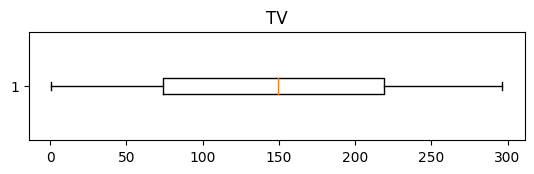

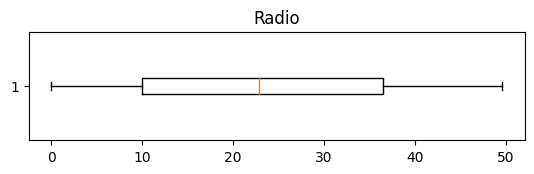

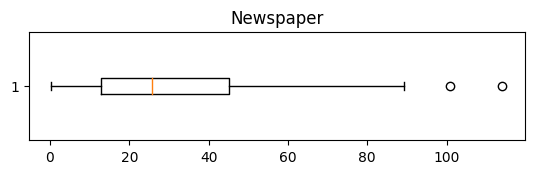

In [148]:
plt.subplot(3, 1, 1)
plt.title('TV')
plt.boxplot(df['TV'], vert = False)
plt.show()

plt.subplot(3, 1, 2)
plt.title('Radio')
plt.boxplot(df['Radio'], vert = False)
plt.show()

plt.subplot(3, 1, 3)
plt.title('Newspaper')
plt.boxplot(df['Newspaper'], vert = False)
plt.show()

there are no significant outliers in the independent variables

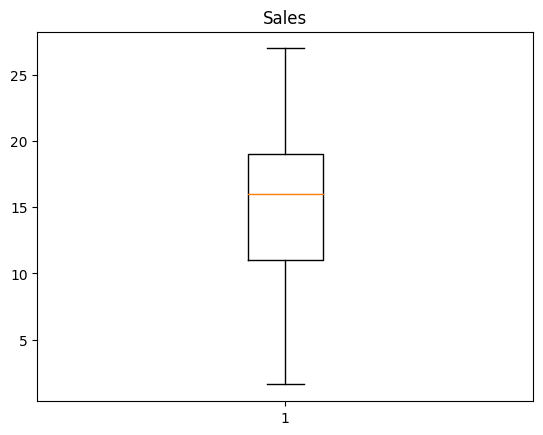

In [149]:
plt.title('Sales')
plt.boxplot(df['Sales'])
plt.show()

Again, there are no outliers in the target variable

##Checking Correlation

Now lets check the correlation of the independent variables with the target variable

<Axes: >

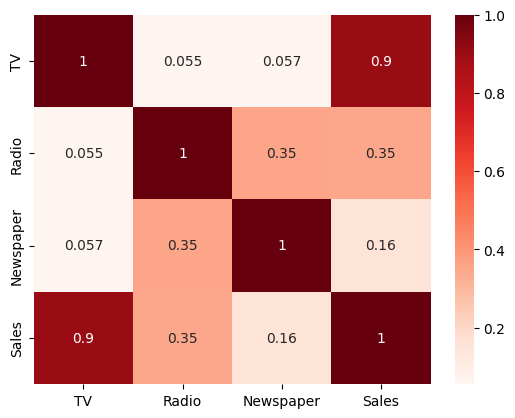

In [150]:
sns.heatmap(df.corr(), cmap = "Reds", annot = True)

*   The above correlations shows that the TV is very highly positively correlated with the sales.

*   It signifies that advertising on TV will generate more and more sales than the other two media i.e. Radio and Newspaper.

*   Newspaper generate the least sales.

Now plotting the relation of all the three medias with the sales.

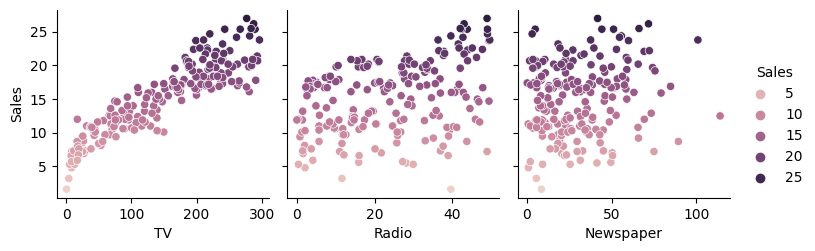

In [151]:
sns.pairplot(df, hue="Sales", x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'])
plt.show()

The above relationships shows that there is a almost linear relationship of TV with Sales, it means that it is tightly related while the relationship of Radio and Newspaper with Sales is scattered, it means that they are very loosly related.

#Model Building

Since the Sales is dependent on every feature individually(mostly on TV), we will now build a Simple Linear Regression model.

Equation of linear regression:

y=c + m1x1 + m2x2 + ... + mnxn

y is the response

c is the intercept

m is the coefficient for the imdependent features

**Building model for TV**

In [152]:
X = df.iloc[:, 0].values
y = df.iloc[:, -1].values

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [154]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)
y_pred = regressor.predict(X_test.reshape(-1,1))

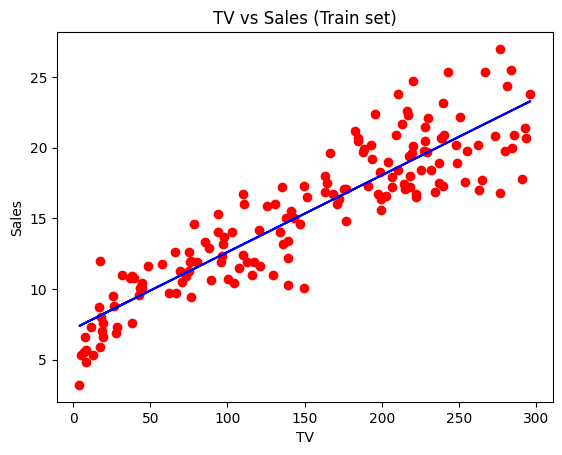

In [155]:
#visualizing train set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('TV vs Sales (Train set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

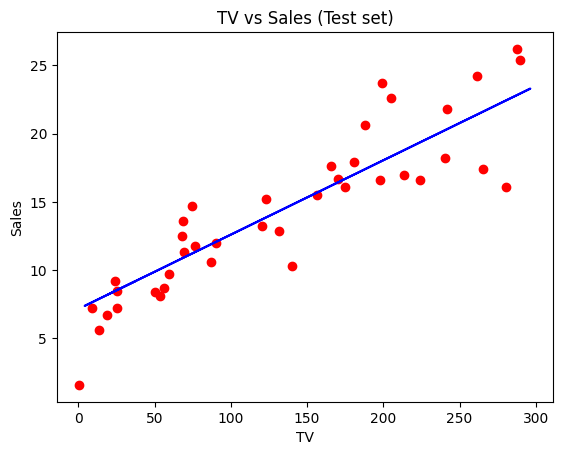

In [156]:
#visualizing test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('TV vs Sales (Test set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [157]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8010943934328406